1. Correlation  
   1.1 Positive correlation  
   1.2 Negative correlation  
   1.3 No / Weak correlation  
   1.4 Plotting more than two correlation plots (heatmap) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color:blue;font-weight:bold"> Correlation  </span>
             
Correlation is used to test if two attributes have any relationship among themselves. Correlation coefficient is a term that is usually used to show the strength of correlation between these two variables.

+1 : Positively correlated (directly related, increase in one causes increase in other) <br>
-1 : Negatively correlated (Indirectly related, increase in one leads to decrease in other)  <br>
0 : No correlation coefficient values nearer to +1 or -1 indicate stronger correlation  <br>

<span style="color:blue;font-weight:bold">  Positive Correlation  </span>

A perfectly positive correlation means that 100% of the time, the variables in question move together by the exact same percentage and direction. A positive correlation can be seen between the demand for a product and the product's associated price. In situations where the avaiable supply stays the same, the price will rise if demand increases.

Correlation between x and y is 0.94


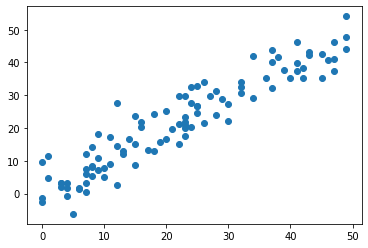

Each value in y is MORE THAN each value in x, where i is any number between [0,5]


In [2]:
np.random.seed(1)
pc_df = pd.DataFrame()

pc_df['x'] = np.random.randint(0,50,100)

pc_df['y'] = pc_df['x'] + np.random.normal(0,5,100)

corr = pc_df['x'].corr(pc_df['y'])

corr

print(f"Correlation between x and y is {round(corr,2)}")

plt.scatter(pc_df['x'],pc_df['y'])
plt.show()
print('Each value in y is MORE THAN each value in x, where i is any number between [0,5]')

<hr style="color:tomato;border:2px solid yellow" >

<span style="color:blue;font-weight:bold">  Negative Correlation  </span>

A perfect negative correlation means the relationship that exists between two variables is negative 100% of the time.Negative correlation is a key concept in portfolio construction, as it enables the creation of diversified portfolios that can better withstand portfolio volatility and smooth out returns. Correlation between two variables can vary widely over time. Stocks generally have negative correlation.

Correlation between x and y :-0.92


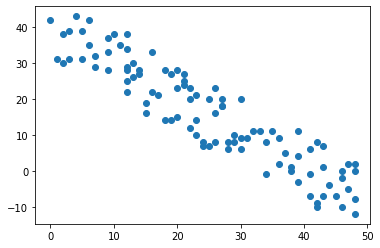

In [3]:
nc_df = pd.DataFrame()
nc_df['x'] = np.random.randint(0,50,100)
nc_df['y'] = 50 - nc_df['x'] - np.random.randint(0,20,100)
corr = nc_df['x'].corr(nc_df['y'])
print(f"Correlation between x and y :{round(corr,2)}")
plt.scatter(nc_df['x'],nc_df['y'])
plt.show()

<span style="color:blue;font-weight:bold"> No/weak Correlation </span>

A weak correlation means that as one variable increases or decreases, there is a lower likelihood of there being a relationship with the second variable.

<pre>
Recall from our last tutorial about Hypothesis testing, in the case of correlation test,

         Null Hypothesis or H0, holds that there is no correlation between attributes being tested
         True Hypothesis or H1, holds that there is a strong correlation between these two attributes
A p-value lesser than the pre-set alpha value violates the H0, thereby making H1 true.

For calculating correlation there are two largely popular tests.

Pearson Correlation test:

                    covariance of x and y
  r =  ------------------------------------------------------
          standard deviation of x * standard deviation of y
Spearman's Correlation test:

                      covariance of rank(x) and rank(y)
  p  (rho)=  ------------------------------------------------------
          standard deviation of rank(x) * standard deviation of rank(y)
          
</pre>          

In [4]:
wk_df = pd.DataFrame()
wk_df['x'] = np.random.randint(0,50,100)
wk_df['y'] = np.random.normal(0,50,100)

In [5]:
corr = wk_df['x'].corr(wk_df['y'] )
corr

0.06734655542869916

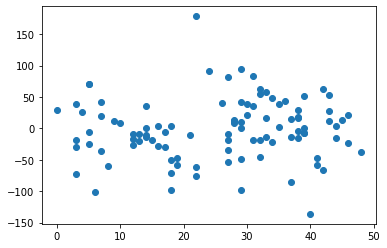

In [6]:
plt.scatter(wk_df['x'],wk_df['y'])
plt.show()

In [7]:
wine_quality = pd.read_csv(r'..\datasets\winequality-red.csv')

In [8]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


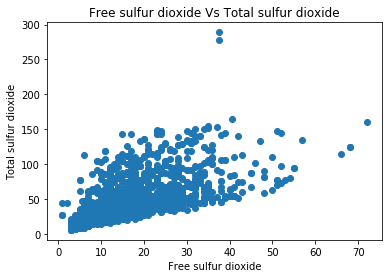

In [9]:
x = wine_quality['free sulfur dioxide']
y = wine_quality['total sulfur dioxide']
plt.title("Free sulfur dioxide Vs Total sulfur dioxide")
plt.xlabel("Free sulfur dioxide")
plt.ylabel("Total sulfur dioxide")
plt.scatter(x,y)
plt.show()

By default Pearson's coefficient of correlation is used while using correlation(.corr()) function

In [10]:
wine_quality['free sulfur dioxide'].corr(wine_quality['density'])

-0.021945831163490047

Using the correlation method as "spearman"

In [11]:
wine_quality['free sulfur dioxide'].corr(wine_quality['density'],method='spearman')

-0.04117767995273563

Both the coefficient methods show that there is a negative correlation among two features stated.

In [12]:
corr = wine_quality.corr()

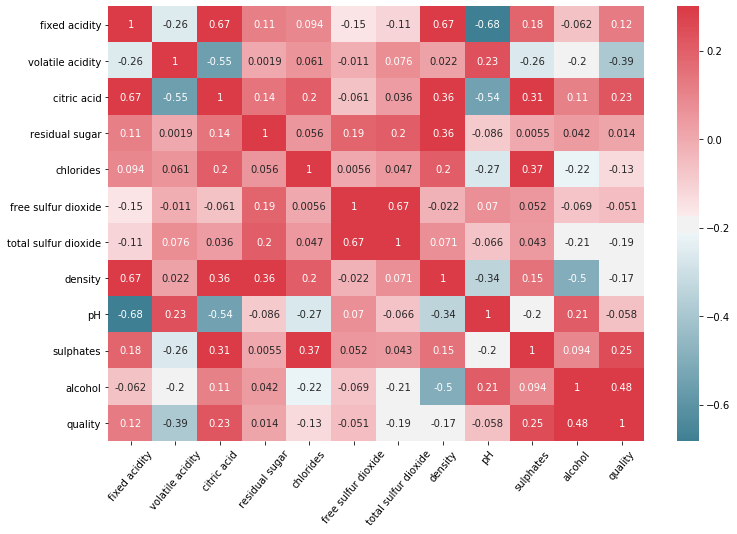

In [13]:
plt.figure(figsize=(12,8))
# cmap = sns.diverging_palette()
cmap = sns.diverging_palette(220,10,as_cmap=True,)
sns.heatmap(corr,annot=True,cmap=cmap,vmax=0.3)
    
plt.xticks(rotation=50)
plt.show()

By default, corr() gives pearsons correlation coefficient <br>
To calculate spearman coefficient use <span style="font-weight:bold">'method=spearman'</span>

In [14]:
# help(wine_quality.corr)

In [15]:
pearson_corr = wine_quality['free sulfur dioxide'].corr(wine_quality['density'])
spearman_corr = wine_quality['free sulfur dioxide'].corr(wine_quality['density'], method='spearman')

print(f"pearson_corr {pearson_corr}")
print(f"spearman_corr {spearman_corr}")

pearson_corr -0.021945831163490047
spearman_corr -0.04117767995273563


* Correlated VS Uncorrelated
* Homoscedasticity and Heteroscedasticity
* Highleverage and Influential observations

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
#Lets generate some data to depict correlated and uncorrelated plots
np.random.seed(42)
x =  np.arange(20)
y_corr = [2*xx+np.random.randint(1) for xx in x]
y_uncorr = np.sin(x)

In [18]:
x_reshaped = x.reshape(-1,1)

In [19]:
lr_corr = LinearRegression()
lr_corr.fit(x_reshaped,y_corr)
y_corr_pred = lr_corr.predict(x_reshaped)

In [20]:
lr_uncorr = LinearRegression()
lr_uncorr.fit(x_reshaped,y_uncorr)
y_uncorr_pred = lr_uncorr.predict(x_reshaped)

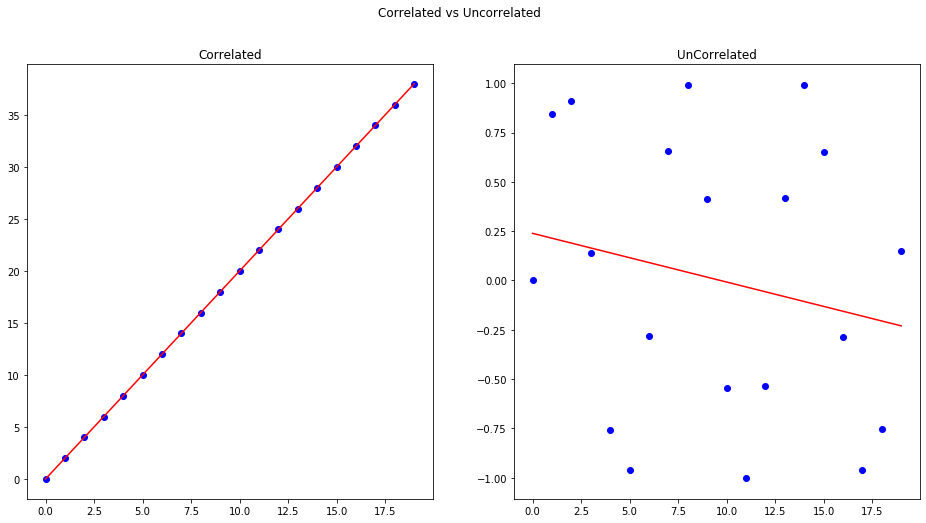

In [21]:
fig,(axs1,axs2) = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle("Correlated vs Uncorrelated")
axs1.set_title("Correlated")
axs1.scatter(x,y_corr,color="blue")
axs1.plot(x,y_corr_pred,color="red")

axs2.set_title("UnCorrelated")
axs2.scatter(x,y_uncorr,color="blue")
axs2.plot(x,y_uncorr_pred,color="red")
plt.show()

In [29]:
y_corr_residual = y_corr - y_corr_pred
y_uncorr_residual = y_uncorr - y_uncorr_pred

In [30]:
#Correlated Residual plots
# y_corr_reshaped = np.array(y_corr).reshape(-1,1)
# y_corr_residual_reshaped = np.array(y_corr_residual).reshape(-1,1)

# lr_residual_corr = LinearRegression()
# lr_residual_corr.fit(y_corr_reshaped,y_corr_residual)
# y_corr_residual_pred = lr_residual_corr.predict(y_corr_reshaped)

# #Uncorrelated Residual plots

# y_uncorr_reshaped = np.array(y_uncorr).reshape(-1,1)
# y_uncorr_residual_reshaped = np.array(y_uncorr_residual).reshape(-1,1)

# lr_residual_uncorr = LinearRegression()
# lr_residual_uncorr.fit(y_uncorr_reshaped,y_uncorr_residual)
# y_uncorr_residual_pred = lr_residual_uncorr.predict(y_uncorr_reshaped)

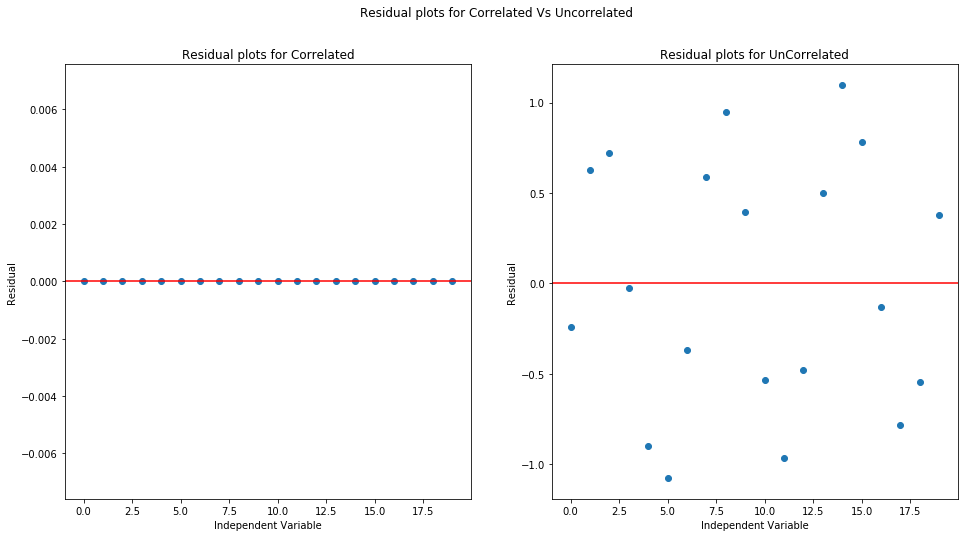

In [31]:
fig,(axs1,axs2) = plt.subplots(1,2,sharex=False,sharey=False,figsize=(16,8))
fig.suptitle("Residual plots for Correlated Vs Uncorrelated")
axs1.set_title("Residual plots for Correlated")
axs1.set_xlabel("Independent Variable")
axs1.set_ylabel("Residual")
axs1.scatter(x,y_corr_residual)
axs1.axhline(y=0,color='red')
# axs1.plot(y_corr,y_corr_residual_pred,color="red")

axs2.set_title("Residual plots for UnCorrelated")
axs2.set_xlabel("Independent Variable")
axs2.set_ylabel("Residual")
axs2.scatter(x,y_uncorr_residual)
axs2.axhline(y=0,color='red')
# axs2.plot(y_uncorr,y_uncorr_residual_pred,color="red")
plt.show()